### Step 1 : Import libraries

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error
#dataset
from sklearn.datasets import fetch_california_housing

print('Modules loaded successfully')

Modules loaded successfully


### Step 2 : Load Data Create DF

In [140]:
data_dict = fetch_california_housing()

data_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [141]:
print(data_dict['feature_names'])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [142]:
print(data_dict['target_names'])

['MedHouseVal']


In [143]:
df = pd.DataFrame(data_dict['data'], columns = data_dict['feature_names'])
df['MedHouseVal'] = data_dict['target']

print('Data loaded successfully')

Data loaded successfully


### Step 3 : Understanding Data using EDA

In [144]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [146]:
df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
6868,2.1061,32.0,3.459239,0.934783,1148.0,3.119565,34.06,-118.11,2.147


In [147]:
df.sample(20)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
702,3.8958,6.0,4.267016,1.029668,1189.0,2.075044,37.63,-122.02,3.01100
13069,2.6471,16.0,4.098667,0.970667,1125.0,3.000000,38.58,-121.30,0.90700
12212,3.4750,6.0,6.352941,1.058824,43.0,2.529412,33.53,-117.19,1.87500
15784,1.8519,52.0,2.654450,1.104712,1055.0,2.761780,37.78,-122.41,0.32500
3931,2.9974,26.0,3.620155,1.037209,1986.0,3.079070,34.21,-118.59,1.78800
4133,2.7098,47.0,4.330601,1.147541,949.0,2.592896,34.13,-118.22,1.73800
12819,3.8272,23.0,6.108558,1.013471,4147.0,3.286054,38.62,-121.48,0.96600
8854,15.0001,52.0,8.710145,1.028986,408.0,2.956522,34.07,-118.41,5.00001
8813,6.2870,34.0,6.268097,1.053619,1031.0,2.764075,33.75,-118.31,3.96400
2242,2.3667,11.0,4.559603,1.097682,1328.0,2.198675,36.83,-119.78,0.69300


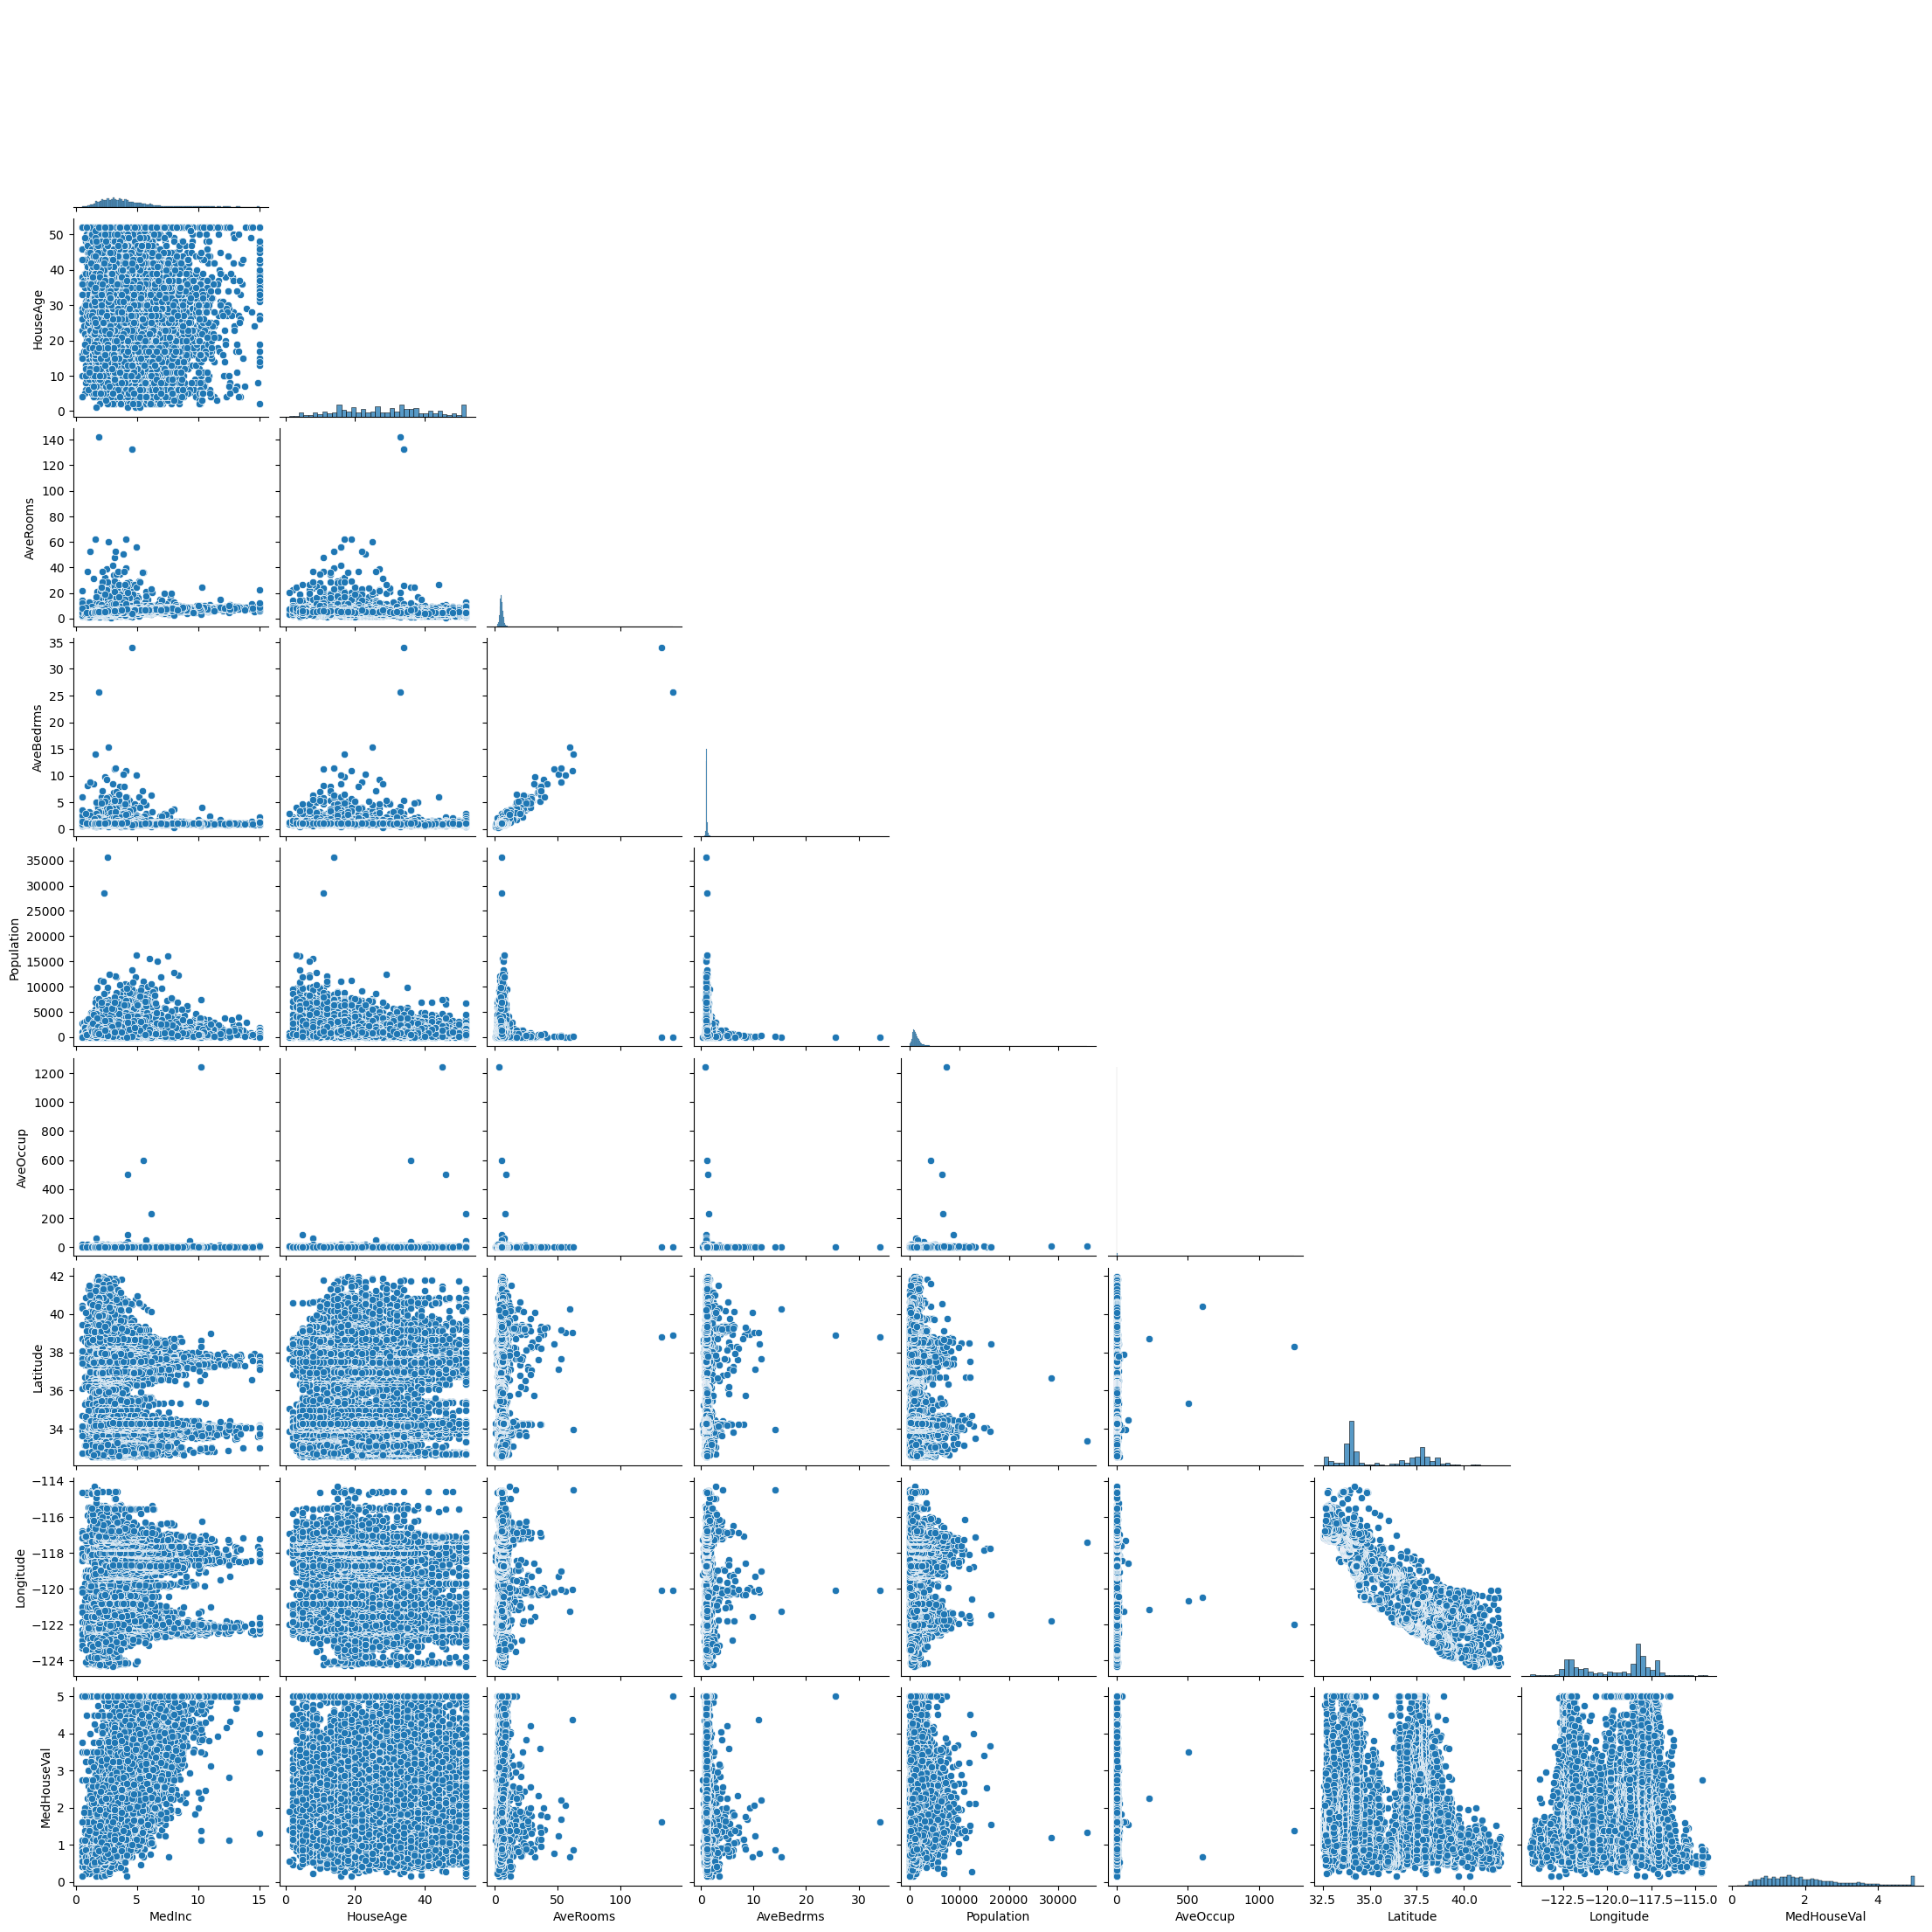

In [148]:
sns.pairplot(data = df,corner = True)
plt.show()

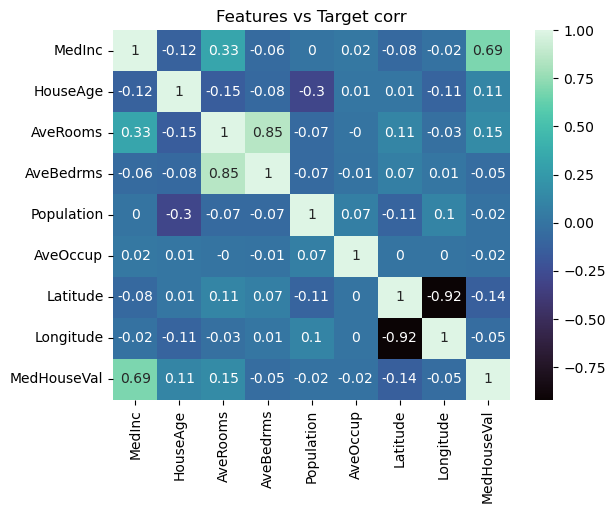

In [149]:
plt.title('Features vs Target corr')
sns.heatmap(df.corr().round(2), annot = True, cmap = 'mako')

plt.show()

In [150]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


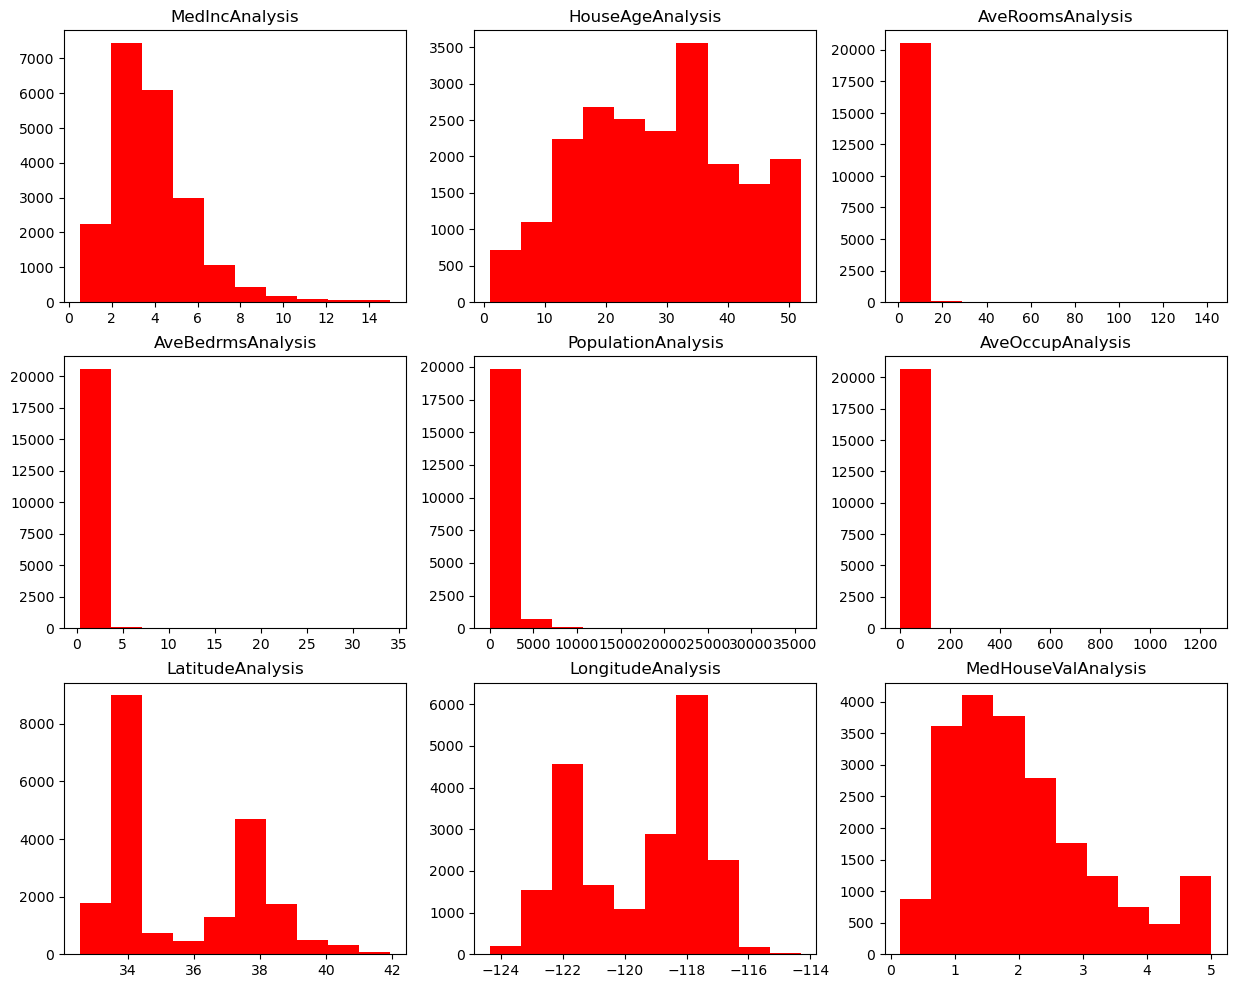

In [151]:
plt.figure(figsize = (15,12))
for i,j in enumerate(df.columns):
    plt.subplot(3,3, i+1)
    plt.hist(df[j], color = 'red')
    plt.title(j + 'Analysis')

plt.show()

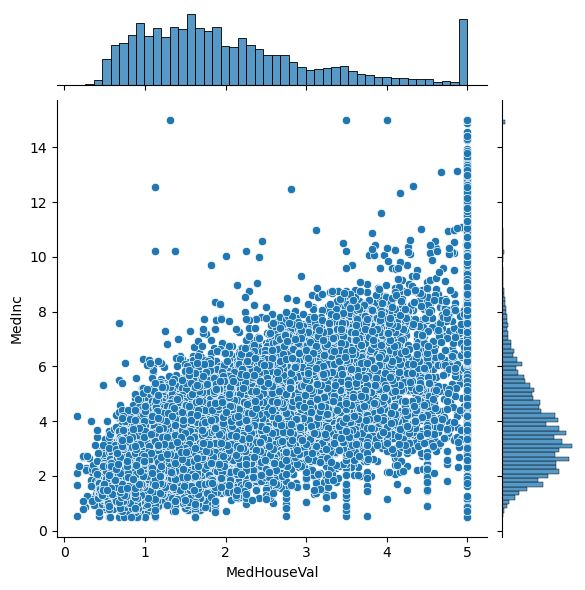

In [152]:
sns.jointplot(data=df, x = 'MedHouseVal', y = 'MedInc')
plt.show()

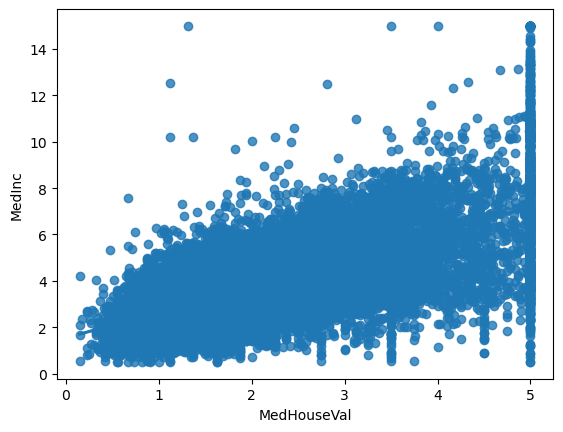

In [153]:
sns.regplot(data = df, x = 'MedHouseVal', y = 'MedInc')
plt.show()

In [154]:
df['MedHouseVal'].describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

### Step 4 : Feature Engineering and Preprocessing

In [155]:
from sklearn.preprocessing import MinMaxScaler

X = df.iloc[:,:-1]
y = df['MedHouseVal']


scaler = MinMaxScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)

print('doneee')

doneee


In [156]:
print(X_scaled.min())
print(X_scaled.max())

0.0
1.0000000000000002


### Step 5 : Train test Split: Split Data for Training and testing Part

In [206]:
#Train test split: Divide into train Part Test Part

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = .2, random_state = 250 )
print('doneee')

doneee


In [207]:
b,a,c,d = [23,534,6,65]
print(a)

534


In [208]:
import random
random.seed(123)
random.randint(1,50)

4

In [212]:
print('shape of Xtrain',X_train.shape)
print('shape of Xtest',X_test.shape)
print('shape of Ytrain',y_train.shape)
print('shape of Ytest',y_test.shape)


shape of Xtrain (16512, 8)
shape of Xtest (4128, 8)
shape of Ytrain (16512,)
shape of Ytest (4128,)


In [213]:
X_scaled.shape


(20640, 8)

In [214]:
20640*.8

16512.0

In [215]:
df.shape

(20640, 9)

# Step 6: Model Buidling

### Step 6.1 Linear Model using Linear Regression

In [216]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression() # Object Creation

lr_model.fit(X_train,y_train) # Trainig Model

LinearRegression()

### Step 6.1.2 Model Prediction

In [217]:
# Test data: X_test

y_pred = lr_model.predict(X_test)
print('Done')

Done


In [218]:
# 20 %: Actual answer: y_test, Predcited: y_pred

lr_compare_df = pd.DataFrame({'Actual House price':y_test,
             'Predicted House price':y_pred})

print('Done')

Done


In [219]:
lr_compare_df

,Actual House price,Predicted House price
15887,2.034,1.271647
10111,3.038,2.456452
6469,2.625,2.191068
9616,0.811,0.956965
18305,4.513,3.781781
...,...,...
1173,0.598,0.385527
12355,1.839,0.884129
14367,2.977,3.021147
16989,3.760,3.638330


In [220]:
lr_mae = mean_absolute_error(y_test,y_pred)
print('Lr MAE',lr_mae)

Lr MAE 0.5405542286124102


In [221]:
lr_mse = mean_squared_error(y_test,y_pred)
print('Lr MSE',lr_mse)

Lr MSE 0.5533882462924902


In [222]:
lr_rmse = lr_mse**.5

print('Lr RMSE',lr_rmse)

Lr RMSE 0.7439006965264182


In [223]:
# Trainig Score
lr_train_score = lr_model.score(X_train,y_train)
print('Training Score',lr_train_score)

# testing Score
lr_test_score = lr_model.score(X_test,y_test)
print('testing Score',lr_test_score)


Training Score 0.6062774496255907
testing Score 0.6051724353472278


In [224]:
# Model score : apx:60% Model not that much good 
# Alternate Model call
# variance inflation factor
# VIF > 10 we can drop that column
# Bias vs Variance Trade Off 

# Training score : High, Testing score  : Low  = Overfit 
# Training score : Low, Testing score  : Low  = Overfit 
# Training score : Balanced,  : Low  = Overfit

# Principal Component Analysis is a dimensionality reduction technique
# PCA : Imp features(cols) Find : (8:5 Imp)


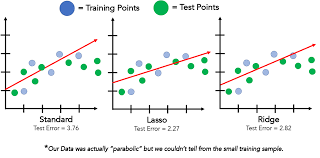

In [225]:
X_train_df = pd.DataFrame(X_train, columns = data_dict['feature_names'])
X_train_df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
729,0.323796,0.431373,0.037829,0.019514,0.04675,0.002262,0.140276,0.672311


In [226]:
X_train_df.shape

(16512, 8)

In [227]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_df['intercept']  = 1

X_train_df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,intercept
9204,0.506255,0.686275,0.045572,0.020933,0.048096,0.001718,0.498406,0.238048,1


In [228]:
vif_df = pd.DataFrame()

vif_df['Features'] = list(data_dict['feature_names']) + ['Intercept']

vif_value = [variance_inflation_factor(X_train_df.values,i) for i in range(X_train_df.shape[1])]

vif_df['VIF factor'] = vif_value

vif_df.sort_values(by = 'VIF factor',ascending= False)

# Because Latitude and Longitude has high corr and vif close to 10 we can drop one or both

,Features,VIF factor
8,Intercept,178.108513
6,Latitude,9.323637
7,Longitude,8.979329
2,AveRooms,8.740015
3,AveBedrms,7.433393
0,MedInc,2.479010
1,HouseAge,1.235533
4,Population,1.130674
5,AveOccup,1.009435


In [229]:
col = list(X.columns)
col.remove('Latitude')

# print(col)

X_train_vif = X_train_df[col]
X_train_vif.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude
15435,0.2549,0.078431,0.033102,0.022662,0.075002,0.001432,0.303785


In [230]:
def built_model(ml_model, col):

    new_X_train = pd.DataFrame(X_train,columns = data_dict['feature_names'])
    final_X_train = new_X_train[col]

    new_X_test = pd.DataFrame(X_test,columns = data_dict['feature_names'])
    final_X_test = new_X_test[col]

    machine_model = ml_model()
    machine_model.fit(final_X_train,y_train)

    model_y_pred = machine_model.predict(final_X_test)

    model_train_score = machine_model.score(final_X_train,y_train)
    model_test_score = machine_model.score(final_X_test,y_test)

    model_mae_error = mean_absolute_error(y_test,model_y_pred)
    model_mse_error = mean_squared_error(y_test,model_y_pred)
    model_rmse_error = model_mse_error**.5
    model_r2_score = r2_score(y_test,model_y_pred)

    model_metrics = {'Model Training Score':model_train_score,
                    'Model Test Score':model_test_score,
                    'MAE Error':model_mae_error,
                    'MSE Error':model_mse_error,
                    'RMSE Error':model_rmse_error,
                    'R2 Score':model_r2_score}

    model_matrix = pd.DataFrame(model_metrics,index = [1])

    return model_matrix,machine_model



In [231]:
ml_model = LinearRegression

built_model(ml_model,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.540845,0.539641,0.582288,0.645237,0.803267,0.539641


In [232]:
from sklearn.linear_model import Lasso, Ridge

In [233]:
ml_model = Lasso
# Lasso regression not giving much score, we can reject this model
built_model(ml_model,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.0,-0.001653,0.928125,1.403912,1.184868,-0.001653


In [234]:
ml_model = Ridge

built_model(ml_model,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.522337,0.528936,0.601353,0.660241,0.812552,0.528936


In [235]:
print(col)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Longitude']


In [236]:
col = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [237]:
all_model = [LinearRegression, Ridge]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

ss_X = sc.fit_transform(X)

i = 1
while True:
  X_train, X_test, y_train, y_test = train_test_split(ss_X, y,random_state=i,test_size=0.1)
  i += 1

  temp_df,final_model = built_model(Ridge,col)
  score = temp_df['Model Test Score'].values[0]

  print('Score is:',score)
  if score >= 0.6:
    print('Best random State',i)

    display(temp_df)
    break

  display(clear=True)

Score is: 0.6067450510265386
Best random State 178


,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.531671,0.606745,0.550302,0.556391,0.745916,0.606745


### Step 7 : Save Model and Extra Objects

In [238]:
import pickle
with open('house_price_pred_ridge_model.pkl','wb') as f:
    pickle.dump(final_model,f)

with open('sc_scaler.pkl','wb') as f:
    pickle.dump(sc,f)

print('ML model and Scaler Saved Successfully')


ML model and Scaler Saved Successfully


### Step 8 : Website Development and Local 

In [239]:
#pip install streamlit

In [240]:
import streamlit as st
print('doneee')

doneee


In [ ]:
!streamlit run house.py

In [241]:
import os

In [242]:
os.getcwd()

'C:\\Users\\chana'

In [243]:
col

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [244]:
df.to_csv('california.csv')
print('donee')

donee


In [245]:
for i in df[col]:
    min_value, max_value = df[i].agg(('min','max'))

    print('min',i,min_value)
    print('max',i,max_value)

min MedInc 0.4999
max MedInc 15.0001
min HouseAge 1.0
max HouseAge 52.0
min AveRooms 0.8461538461538461
max AveRooms 141.9090909090909
min AveBedrms 0.3333333333333333
max AveBedrms 34.06666666666667
min Population 3.0
max Population 35682.0
min AveOccup 0.6923076923076923
max AveOccup 1243.3333333333333


In [246]:
# read_data
temp_df = pd.read_csv('california.csv')

for i in temp_df[col]:
    min_value, max_value = df[i].agg(['min','max'])

In [254]:
import streamlit as st
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler
import pickle

# Title

col = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

st.title('California Housing Price Prediction')

st.image('https://nycdsa-blog-files.s3.us-east-2.amazonaws.com/2021/03/chaitali-majumder/house-price-497112-KhCJQICS.jpg')



st.header('Model of housing prices to predict median house values in California ',divider=True)

# st.subheader('''User Must Enter Given values to predict Price:
# ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']''')


st.sidebar.title('Select House Features 🏠')

st.sidebar.image('https://png.pngtree.com/thumb_back/fh260/background/20230804/pngtree-an-upside-graph-showing-prices-and-houses-in-the-market-image_13000262.jpg')


# read_data
temp_df = pd.read_csv('california.csv')

random.seed(12)

all_values = []

for i in temp_df[col]:
    min_value, max_value = temp_df[i].agg(['min','max'])

    var =st.sidebar.slider(f'Select {i} value', int(min_value), int(max_value),
                      random.randint(int(min_value),int(max_value)))

    all_values.append(var)

ss = StandardScaler()
ss.fit(temp_df[col])

final_value = ss.transform([all_values])

with open('house_price_pred_ridge_model.pkl','rb') as f:
    chatgpt = pickle.load(f)

price = chatgpt.predict(final_value)[0]



import time


st.write(pd.DataFrame(dict(zip(col, all_values)),index = [1]))

progress_bar = st.progress(0)
placeholder = st.empty()
placeholder.subheader('Predicting Price')
place = st.empty()
place.image('https://i.pinimg.com/originals/f5/27/0a/f5270acbc4b98112fcd520d2eea023de.gif')

if price>0:
    body = f'Predicted Median House Price: ${round(price,2)} Thousand Dollars'
    placeholder.empty()
    place.empty()
    # st.subheader(body)

    st.success(body)
else:
    body = 'Invalid House features Values'
    st.warning(body)













2025-08-07 14:08:33.791 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-07 14:08:33.793 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-07 14:08:33.795 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-07 14:08:33.796 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-07 14:08:33.798 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-07 14:08:33.799 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-07 14:08:33.801 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-07 14:08:33.803 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

### STEP 9 : live Development Using Streamlit

In [ ]:
# import streamlit as st
# import pandas as pd
# import random
# import sklearn.preprocessing import StandardScaler
# import pickle
# import time

In [255]:
#GitHub : Folder Housing Price Project
#requirements.txt = we will write these modules which is important for app.py to run



In [258]:
pd.__version__

'2.2.3'

In [259]:
st.__version__

'1.45.1'

In [260]:
import sklearn


In [261]:
sklearn.__version__

'1.6.1'